## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [50]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [51]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [52]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [53]:
Xtest['f11'] = Xtest['f11'].astype(float)
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   float64
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 293.1 KB


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='target'>

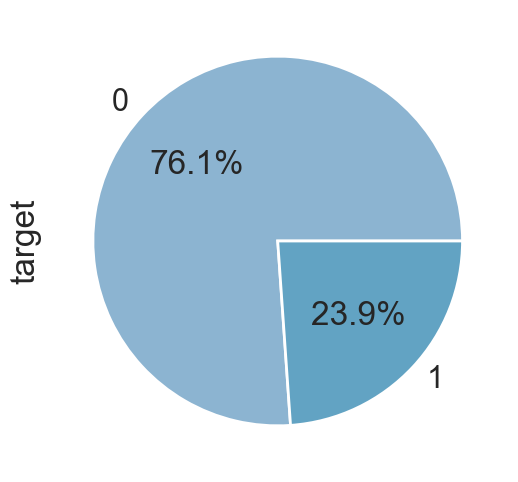

In [55]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
Xtrain.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "target",
                                       autopct='%1.1f%%')

<Axes: ylabel='target'>

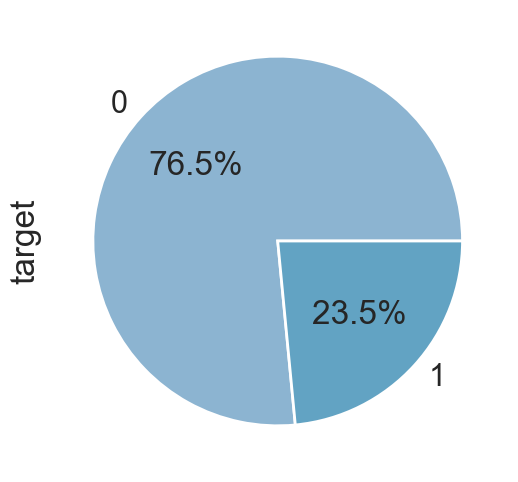

In [56]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
Xtest.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "target",
                                       autopct='%1.1f%%')

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

Ответ: Использование accuracy в несбалансированных наборах данных может привести к неправильным выводам о производительности модели. Рекомендуется использовать более подходящие метрики, такие как balanced accuracy, F1 score или ROC AUC, чтобы получить более полное представление о качестве модели.

В данном случае просто предсказывая класс 0 модель будет иметь accuracy = 76 - что сделает её не пригодной

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [57]:
missing_per_column = Xtrain.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)

Количество пустых значений по каждому столбцу:
f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64


In [58]:
duplicate_rows_data = Xtrain[Xtrain.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 15)


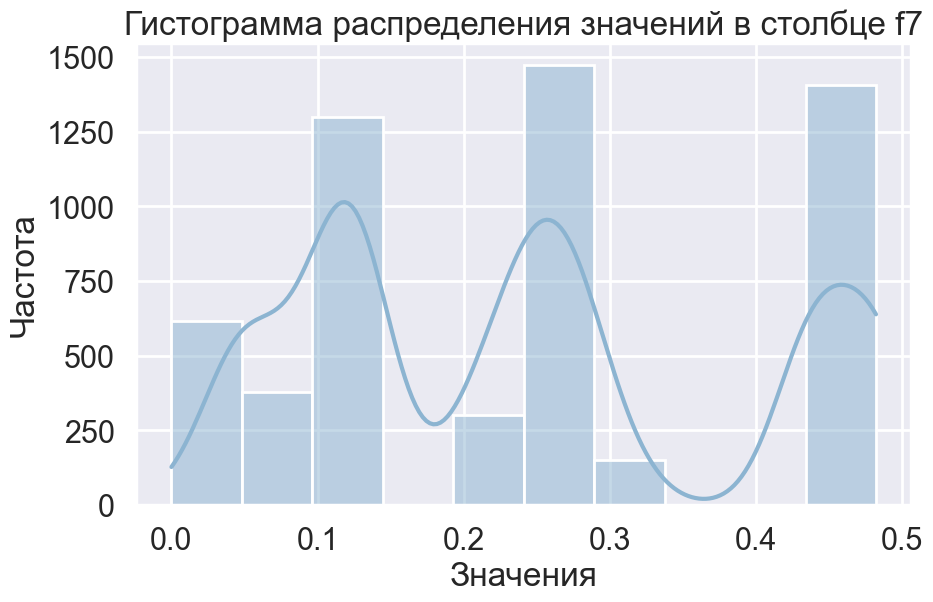

In [59]:
# Визуализация гистограммы

plt.figure(figsize=(10, 6))
sns.histplot(Xtrain['f7'], bins=10, kde=True)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений в столбце f7')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [60]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


В столбце f7 очень много значений NAN - у меня мало информации о датасете, думаю можно не нарушая общности заменить NAN на 0

In [61]:
Xtrain['f2'] = Xtrain['f2'].fillna(0)
Xtrain['f7'] = Xtrain['f7'].fillna(0)
Xtrain['f11'] = Xtrain['f11'].fillna(0)

In [62]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [63]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split

X = Xtrain.drop('target', axis=1)
y = Xtrain['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
results = []
scores = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary')
    ]
results.append(scores)

# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
results_df


c:\Users\Klimov_as\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1
0,0.808667,0.76699,0.230994,0.355056


1. Accuracy

    Определение: Доля правильных предсказаний среди всех предсказаний.
    Значение: 0.808667 (или 80.87%) указывает на то, что модель правильно классифицировала около 81% всех случаев. Это хороший показатель, но важно учитывать баланс классов.

2. Precision

    Определение: Доля истинных положительных предсказаний среди всех положительных предсказаний.
    Значение: 0.76699 (или 76.70%) говорит о том, что из всех случаев, предсказанных как положительные, 76.70% действительно являются положительными. Это указывает на то, что модель делает относительно немного ложных срабатываний.

3. Recall

    Определение: Доля истинных положительных предсказаний среди всех фактических положительных случаев.
    Значение: 0.230994 (или 23.10%) указывает на то, что модель смогла правильно идентифицировать только 23.10% всех положительных случаев. Это низкий показатель, что может означать, что модель пропускает много положительных случаев (высокий уровень ложных отрицательных).

4. F1 Score

    Определение: Гармоническое среднее между точностью и полнотой (recall).
    Значение: 0.355056 (или 35.51%) показывает, что, несмотря на хорошую точность, низкий уровень полноты значительно снижает общую эффективность модели. Это указывает на необходимость улучшения модели, чтобы повысить способность к обнаружению положительных случаев.

Заключение

    Общая интерпретация: Модель демонстрирует хорошую точность и точность, но низкий уровень полноты и F1-оценка указывают на проблемы с обнаружением положительных случаев. Это может быть признаком несбалансированного набора данных или недостаточной способности модели к выявлению положительных классов

In [64]:
from sklearn.svm import SVC  # Импортируем SVC
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели SVC

model = SVC() 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка метрик

results = []

scores = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='binary'),
    recall_score(y_test, y_pred, average='binary'),
    f1_score(y_test, y_pred, average='binary')
]

results.append(scores)
# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'])

print(results_df)

   Accuracy  Precision    Recall        F1
0     0.782   0.941176  0.046784  0.089136


F1 Метрика показывает ту же проблему, что и в модели линейной регрессии - несбаллансированность классов

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

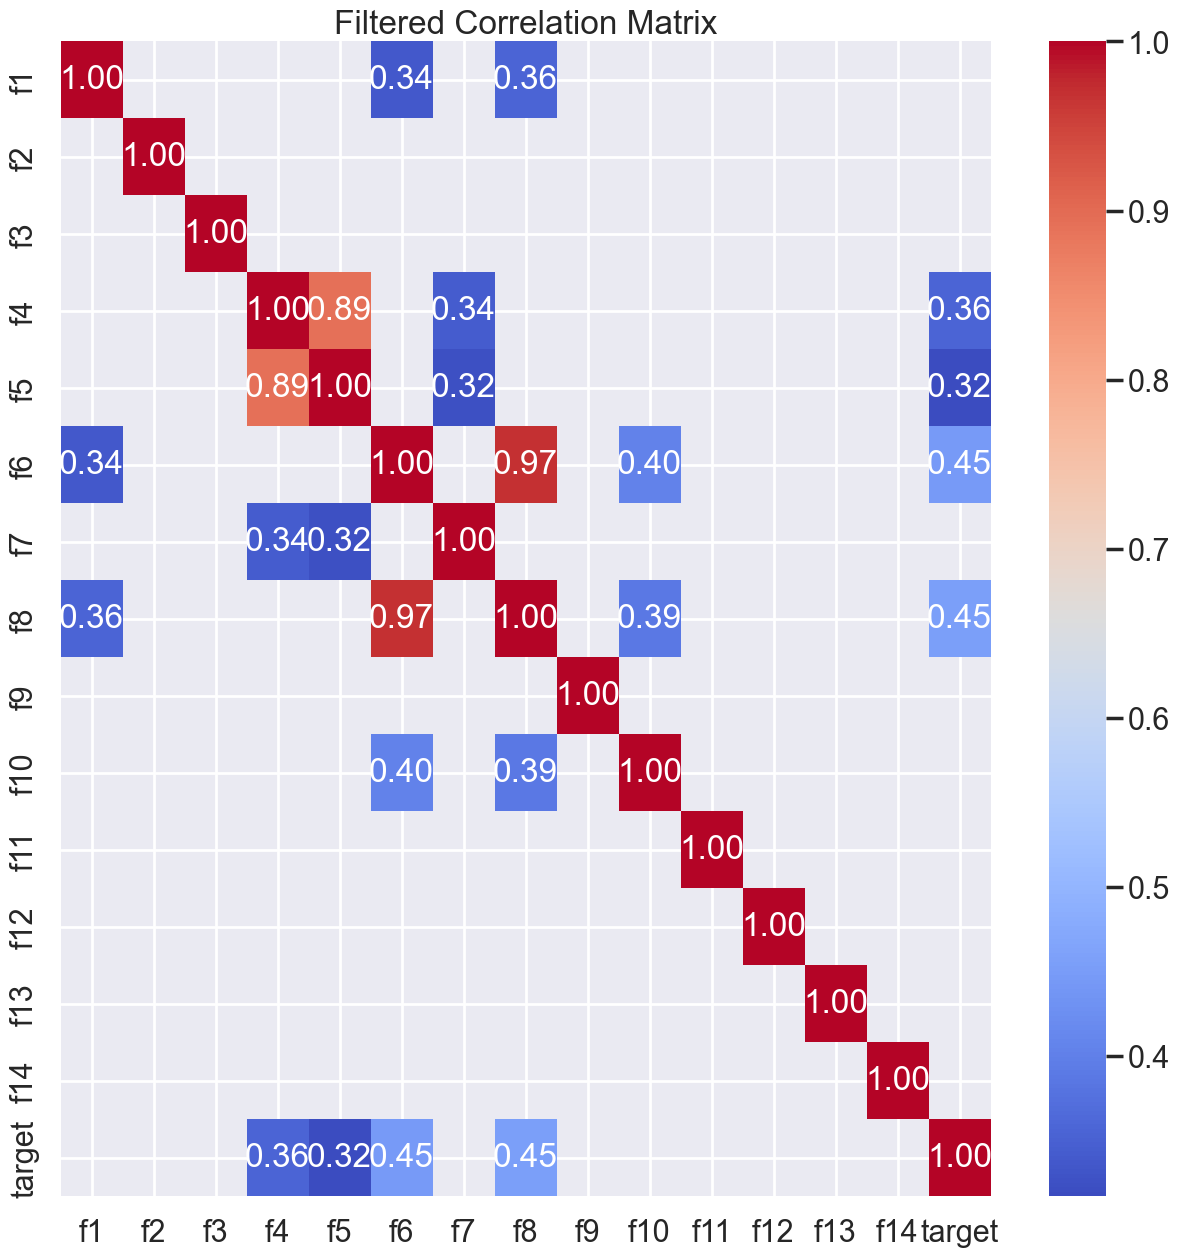

In [65]:
# Предполагается, что Xtrain уже определен и содержит данные

corr_matrix = Xtrain.corr()
# Фильтрация матрицы корреляции
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.3) | (corr_matrix <= -0.3)]

# Удаление строк и столбцов, которые содержат только NaN
filtered_corr_matrix = filtered_corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Визуализация отфильтрованной матрицы корреляции
plt.figure(figsize=(15, 15))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Filtered Correlation Matrix')
plt.show()

Имеются взаимозависимые атрибуты: f4 и f5 с corr coef = 0.89 и f6 и f8 с corr coef = 0.97

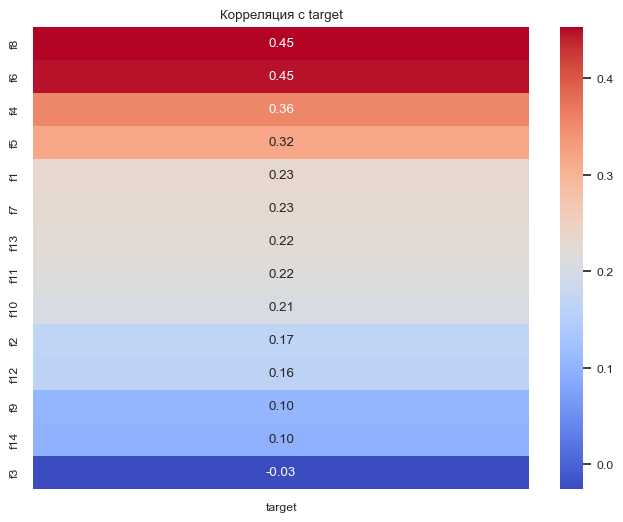

In [66]:
corr = Xtrain.corr()
target_corr = corr['target'].drop('target')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с target')
plt.show()

Для начала масштабируем признаки

In [67]:
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
# Создание и обучение модели SVC
model = SVC() 
model.fit(X_train_scaled, y_train)
# Предсказания

y_pred = model.predict(X_test_scaled)
# Оценка метрик

results = []
scores = [

    accuracy_score(y_test, y_pred),

    precision_score(y_test, y_pred, average='binary'),

    recall_score(y_test, y_pred, average='binary'),

    f1_score(y_test, y_pred, average='binary')

]
results.append(scores)
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df)

   Accuracy  Precision    Recall        F1
0  0.841333      0.708  0.517544  0.597973


Масштабирование дало прирост F1 меры до 0.59 - что является очень хорошим результатом.
Попробуем добавить class_weight

In [68]:
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
# Создание и обучение модели SVC
model = SVC(class_weight='balanced') 
model.fit(X_train_scaled, y_train)
# Предсказания

y_pred = model.predict(X_test_scaled)
# Оценка метрик

results = []
scores = [

    accuracy_score(y_test, y_pred),

    precision_score(y_test, y_pred, average='binary'),

    recall_score(y_test, y_pred, average='binary'),

    f1_score(y_test, y_pred, average='binary')

]
results.append(scores)
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df)

   Accuracy  Precision    Recall        F1
0      0.78   0.509868  0.906433  0.652632


Ещё лучше!

А теперь постараемся избавиться от ненужных или избыточных признаков с помощью (Least Absolute Shrinkage and Selection Operator). Используем регуляризацию L1

In [69]:
from sklearn.linear_model import Lasso
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Создание и обучение модели Lasso для отбора признаков
lasso = Lasso(alpha=0.04)  # Вручную подбираем оптимальную alpha
lasso.fit(X_train_scaled, y_train)

# Получение индексов релевантных признаков
relevant_features = np.where(lasso.coef_ != 0)[0]
# Отбор релевантных признаков
X_train_selected = X_train_scaled[:, relevant_features]
X_test_selected = X_test_scaled[:, relevant_features]

# Создание и обучение модели SVC с отобранными признаками
model = SVC(class_weight='balanced') 
model.fit(X_train_selected, y_train)
# Предсказания
y_pred = model.predict(X_test_selected)
# Оценка метрик
results = []
scores = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='binary'),
    recall_score(y_test, y_pred, average='binary'),
    f1_score(y_test, y_pred, average='binary')
]
results.append(scores)
# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df)

# Выводим индексы и количество отобранных признаков

print(f"Отобранные признаки: {relevant_features}")

print(f"Количество отобранных признаков: {len(relevant_features)}")

   Accuracy  Precision    Recall        F1
0     0.776   0.504934  0.897661  0.646316
Отобранные признаки: [ 0  3  4  5  6  7 10 11 12]
Количество отобранных признаков: 9


Количество признаков сокращено до 9-ти, без существенного изменения F1 меры, что является хорошим результатом

Попробуем подобрать параметр alpha ещё более точно

In [70]:
from sklearn.model_selection import GridSearchCV

X = Xtrain.drop('target', axis=1)

y = Xtrain['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
param_grid = {

    'alpha': np.linspace(0.001, 0.9, 50)  # Пробуем значения от 0.001 до 0.9

}
# Создание модели Lasso
lasso = Lasso()
# Настройка Grid Search
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
# Получение лучшего значения alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Лучшее значение alpha: {best_alpha}")
# Обучение модели Lasso с оптимальным alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)
# Получение индексов релевантных признаков
relevant_features = np.where(lasso_best.coef_ != 0)[0]
# Отбор релевантных признаков
X_train_selected = X_train_scaled[:, relevant_features]
X_test_selected = X_test_scaled[:, relevant_features]
# Создание и обучение модели SVC с отобранными признаками
model = SVC(class_weight='balanced') 
model.fit(X_train_selected, y_train)
# Предсказания
y_pred = model.predict(X_test_selected)
# Оценка метрик
results = []
scores = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='binary'),
    recall_score(y_test, y_pred, average='binary'),
    f1_score(y_test, y_pred, average='binary')
]
results.append(scores)
# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df)
# Выводим индексы и количество отобранных признаков

print(f"Отобранные признаки: {relevant_features}")

print(f"Количество отобранных признаков: {len(relevant_features)}")

Лучшее значение alpha: 0.001
   Accuracy  Precision    Recall        F1
0      0.78   0.509868  0.906433  0.652632
Отобранные признаки: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Количество отобранных признаков: 14


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [71]:
X_test_new = pd.DataFrame(Xtest.drop('target', axis=1))  # Ваш новый датасет

y_test_new = pd.Series(Xtest['target']) 

# 1. Масштабирование нового датасета
X_test_new_scaled = scaler.transform(X_test_new)
# 2. Отбор тех же признаков, что и в обучающем наборе
X_test_new_selected = X_test_new_scaled[:, relevant_features]
# 3. Сделать предсказания
y_pred_new = model.predict(X_test_new_selected)
# 4. Оценка метрик
results = []
scores = [

    accuracy_score(y_test_new, y_pred_new),
    precision_score(y_test_new, y_pred_new, average='binary'),
    recall_score(y_test_new, y_pred_new, average='binary'),
    f1_score(y_test_new, y_pred_new, average='binary')
]

results.append(scores)
# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'])
print(results_df)
# 5. Вывод предсказаний
print("Предсказания на новом датасете:")
print(y_pred_new)

   Accuracy  Precision   Recall        F1
0     0.776   0.523643  0.50937  0.516408
Предсказания на новом датасете:
[0 0 0 ... 1 1 1]


На обучающем датасете F1 мера показала лучший результат, т.е. модель, похоже переобучилась

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [72]:
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Создание и обучение модели Lasso для отбора признаков
lasso = Lasso(alpha=0.04)  # Вручную подбираем оптимальную alpha
lasso.fit(X_train_scaled, y_train)

# Получение индексов релевантных признаков
relevant_features = np.where(lasso.coef_ != 0)[0]
# Отбор релевантных признаков
X_train_selected = X_train_scaled[:, relevant_features]
X_test_selected = X_test_scaled[:, relevant_features]

# Создание и обучение модели LogisticRegression с отобранными признаками
model1 = LogisticRegression(class_weight='balanced') 
model1.fit(X_train_selected, y_train)
# Предсказания
y_pred_model1 = model1.predict(X_test_selected)

model2 = SVC(class_weight='balanced')
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)

# Подбор значения α
best_alpha = 0
best_f1 = 0
alpha_values = np.linspace(0, 1, 100)  # 100 значений от 0 до 1

for alpha in alpha_values:
    # Смешивание предсказаний
    pred_final = (alpha * y_pred_model1) + ((1 - alpha) * y_pred_model2)
    pred_final_binary = np.round(pred_final).astype(int)  # Преобразование в бинарные предсказания
    # Оценка метрик

    f1 = f1_score(y_test, pred_final_binary, average='binary')
    # Сохранение лучшего α
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha
# Вывод результатов
print(f"Лучшее значение α: {best_alpha}")
print(f"Лучший F1 Score: {best_f1}")
# Итоговое предсказание с лучшим α
pred_final = (best_alpha * y_pred_model1) + ((1 - best_alpha) * y_pred_model2)
pred_final_binary = np.round(pred_final).astype(int)

# Оценка качества итогового предсказания
accuracy = accuracy_score(y_test, pred_final_binary)
precision = precision_score(y_test, pred_final_binary, average='binary')
recall = recall_score(y_test, pred_final_binary, average='binary')

print(f"Accuracy: {accuracy}")

print(f"Precision: {precision}")

print(f"Recall: {recall}")

Лучшее значение α: 0.5050505050505051
Лучший F1 Score: 0.6519337016574586
Accuracy: 0.79
Precision: 0.5239786856127886
Recall: 0.8625730994152047


In [74]:
X_test = pd.DataFrame(Xtest.drop('target', axis=1))  # Ваш новый датасет

y_test_new = pd.Series(Xtest['target']) 

# Масштабирование нового тестового датасета

X_test_new_scaled = scaler.transform(X_test)

# Отбор тех же признаков, что и в обучающем наборе
X_test_new_selected = X_test_new_scaled[:, relevant_features]
# Предсказания на новом тестовом датасете
y_pred_model1_new = model1.predict(X_test_new_selected)
y_pred_model2_new = model2.predict(X_test)  # Используем оригинальный X_test для SVC
# Смешивание предсказаний с лучшим α
pred_final_new = (best_alpha * y_pred_model1_new) + ((1 - best_alpha) * y_pred_model2_new)
pred_final_binary_new = np.round(pred_final_new).astype(int)
# Оценка качества итогового предсказания на новом тестовом датасете
accuracy_new = accuracy_score(y_test_new, pred_final_binary_new)
precision_new = precision_score(y_test_new, pred_final_binary_new, average='binary')
recall_new = recall_score(y_test_new, pred_final_binary_new, average='binary')
f1_new = f1_score(y_test_new, pred_final_binary_new, average='binary')
# Вывод результатов

print(f"Accuracy на новом тестовом датасете: {accuracy_new}")

print(f"Precision на новом тестовом датасете: {precision_new}")

print(f"Recall на новом тестовом датасете: {recall_new}")

print(f"F1 Score на новом тестовом датасете: {f1_new}")

Accuracy на новом тестовом датасете: 0.8148
Precision на новом тестовом датасете: 0.6319148936170212
Recall на новом тестовом датасете: 0.5059625212947189
F1 Score на новом тестовом датасете: 0.5619678334910123


F1 мера на тестовом датасете была 0.51, стала 0.56, ансамблирование улучшило результат

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

Благодаря методам оптимизации данных удалось получить не плохие значения F1 меры и других мтерик на обучающих датасетах.

На тестовой части обучающих данных F1 достигало 0.65

На отложенных данных F1 мера показала результат 0.56, без ухудшения других метрик. \

Я считаю что модель является переобученной, но в целом даже значение F1 = 0.65 не является достаточно высоким, чтобы утверждать что модель хорошо научилась классифицировать данные.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.